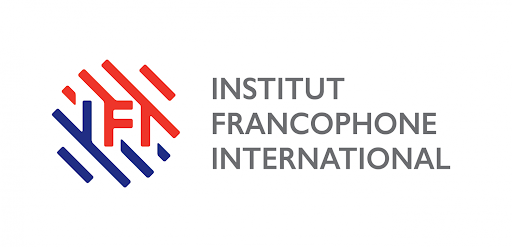
---
---
<h1 align="center">Reconnaissance d'objet</h1>
<h3 align="center">projet de classification des scènes naturelles d'image a l'aide de l'apprentissage profonde<h3>

---
**Objectif :** 
Le terme de scènes naturelles se réfère à l’ensemble des images représentant le monde réel dans lequel on évolue et qui peuvent subir un changement d’état sous l’effet des actions des êtres vivants. 

Ces scènes qui peuvent être Intérieures ou Extérieures renferment des catégories ou classe d’image telles que :


*   Scène Intérieure : Cuisine, Lit de maison, Salle à manger, Bureau, etc.
*   Scène Extérieure : Jardin, Rue, Batiment, Forêt, Rivière, Mer, Paysage, glacier, Montagne, etc.

Alors a travers cette étude, notre objectif se porte sur l’expérimentation et l'implementation plusieurs modèles pour classer les images de scènes a travers l'apprentissage profonde d'où le développement des modèles se fait de 2 manières, 

*    en construisant le modèle à partir de zéro 
*    en utilisant des modèles pré-entraînés. 


#### **Vérifiez la connexion et path du projet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/'My Drive'/Scene_naturelle-classification/DATA

/content/drive/My Drive/Scene_naturelle-classification/DATA


#Deep learning

Le deep learning a révolutionné l'intelligence artificielle en nous aidant à construire des machines et des systèmes dont on ne rêvait que dans le passé. En substance, le Deep Learning est une sous-secte du Machine Learning qui utilise des réseaux de neurones artificiels profonds pour résoudre les problèmes de Apprentissage automatique .

*       Un réseau neuronal profond est juste un réseau neuronal avec de nombreuses couches empilées les unes sur les autres - plus le nombre de couches est élevé, plus le réseau est profond.

A travers notre travail , nous avons utilise deux de ces frameworks Deep Learning.
*             Tensorflow
*             Keras

Tensorflow est un cadeau de Google aux développeurs impliqués dans l'apprentissage automatique et c'est la bibliothèque la plus utilisée dans le développement de modèles de Deep Learning, il s'agit d'une plate-forme open-source.

Keras, à l'autre extrémité, est une API de haut niveau qui repose sur TensorFlow. Il est extrêmement convivial et comparativement plus facile que TensorFlow. 

#### **installation des Frameworks**

In [ ]:
!pip install tensorflow
!pip install keras

#### **importation des bibliotheques & Verification des versions**



In [ ]:
import tensorflow as tf
#exec(open('').read())
%cd '/content/drive/MyDrive/Scene_naturelle-classification/'
import librys

print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/content/drive/MyDrive/Scene_naturelle-classification
TensorFlow version : 2.4.1
Num GPUs Available:  0


#### **Load Dataset et prise de vue**

In [ ]:
librys.trainSampleView()

Output hidden; open in https://colab.research.google.com to view.

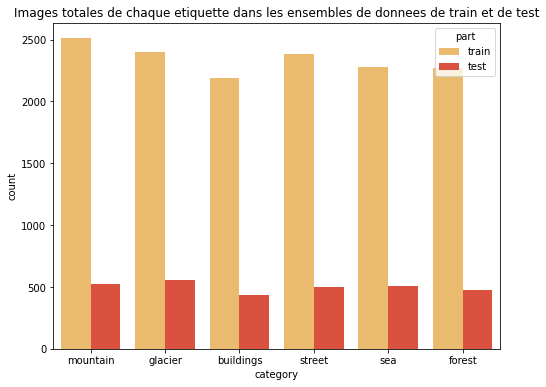

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


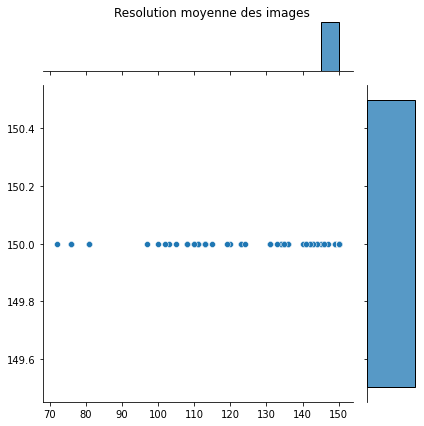

In [ ]:
img_shape = librys.dataInfo(img_res=True)

Notre travail suit un modele de workflow tel que suit :

*     Examiner et comprendre les données
*     Construire un pipeline d'entrée
*     Construisez le modèle
*     Former le modèle
*     Tester le modèle
*     Améliorez le modèle et répétez le processus

#### **Prétraitement des images**

In [ ]:
param_augment = {"rotation_range":20,"width_shift_range":0.3,"height_shift_range":0.3,"shear_range":0.2,"brightness_range":(0.1,0.9),"zoom_range":[0.2,1.5],"channel_shift_range":150,"horizontal_flip":True,"fill_mode":'nearest'}

categories, total_categories, train_data, test_data, labels_dict = librys.dataPrep(image_shape=(img_shape[0],img_shape[1]),
                                                                                    color_mode='rgb',
                                                                                    batch_size=64,
                                                                                    class_mode='categorical',
                                                                                    image_augmentation=param_augment)

Found 14035 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#### **Creation du model**

In [ ]:
model = librys.modeling(input_shape=img_shape, output_label=total_categories, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 147, 148, 256)     7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 146, 128)     295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 73, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 71, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [ ]:
model, history = librys.trainModel(model=model, data_train=train_data, data_validation=test_data, early_stop=True, patience=10, checkpoint=True, model_name="CNNscratch_1", num_epochs=100, verbose=1)

Epoch 1/70
219/219 [==============================] - 158s 680ms/step - loss: 1.6127 - accuracy: 0.3304 - val_loss: 1.0742 - val_accuracy: 0.5571

Epoch 00001: val_loss improved from inf to 1.07417, saving model to models/CNNscratch_1.h5
Epoch 2/70
219/219 [==============================] - 151s 686ms/step - loss: 1.3576 - accuracy: 0.4554 - val_loss: 1.0492 - val_accuracy: 0.5771

Epoch 00002: val_loss improved from 1.07417 to 1.04925, saving model to models/CNNscratch_1.h5
Epoch 3/70
219/219 [==============================] - 151s 689ms/step - loss: 1.2568 - accuracy: 0.4906 - val_loss: 0.8828 - val_accuracy: 0.6600

Epoch 00003: val_loss improved from 1.04925 to 0.88282, saving model to models/CNNscratch_1.h5
Epoch 4/70
219/219 [==============================] - 151s 689ms/step - loss: 1.1947 - accuracy: 0.5304 - val_loss: 0.8840 - val_accuracy: 0.6698

Epoch 00004: val_loss did not improve from 0.88282
Epoch 5/70
219/219 [==============================] - 150s 683ms/step - loss: 1.

#### **Evaluation du Modele**

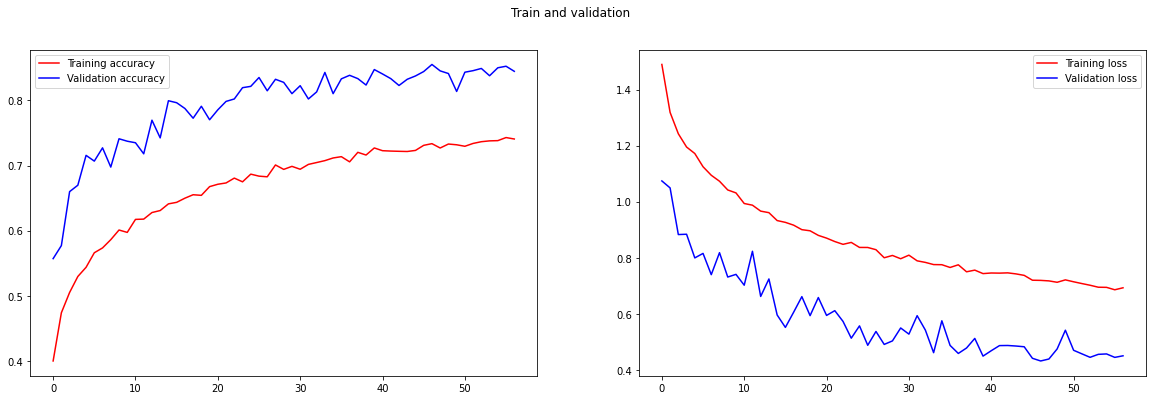




47/47 [==============================] - 8s 167ms/step - loss: 0.4438 - accuracy: 0.8517
validation accuracy : 85.16666889190674%
validation loss : 0.44376903772354126


In [ ]:
librys.modelEvaluation(model=model, history=history, data_validation=test_data)

              precision    recall  f1-score   support

   buildings       0.77      0.89      0.82       437
      forest       0.95      0.97      0.96       474
     glacier       0.84      0.81      0.83       553
    mountain       0.85      0.78      0.81       525
         sea       0.83      0.88      0.85       510
      street       0.89      0.80      0.84       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000





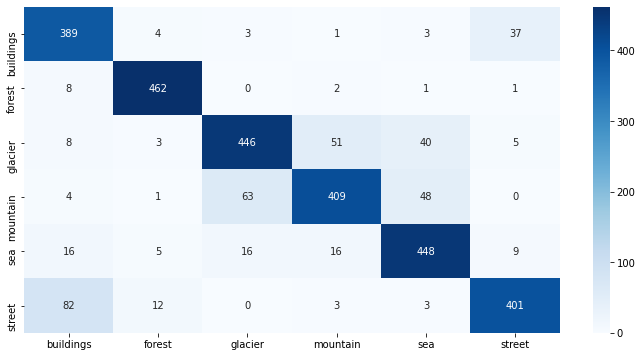

In [ ]:
librys.modelReport(model=model, data_validation=test_data)

Enfin, utilisons notre modèle pour classer une image qui n'était pas incluse dans les ensembles de formation ou de validation.

#### **Prédire de nouvelles images sans étiquette**

In [ ]:
librys.predictNewImagesInBatch(model=model, categories_dict=labels_dict, image_shape=img_shape)

Output hidden; open in https://colab.research.google.com to view.